The CSV file for Microsoft's stock contains the OHLCVA data where, 



* O: Open
* H: High
* L: Low
* C: Close
* V: Volume
* A: Adjusted









In [63]:
from google.colab import files
files.upload()
import os
#os.listdir()

Saving StockPortfolio.csv to StockPortfolio.csv


In [0]:
import matplotlib.pyplot as plt

In [29]:
import pandas as pd
df_stock=pd.read_csv('MSFTPrices.csv.txt', parse_dates=['Date'])
df_stock.head()

,Date,Open,High,Low,Close,Volume,Adjusted
0,2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809
1,2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345
2,2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851
3,2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688
4,2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828


In [30]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4561 entries, 0 to 4560
Data columns (total 7 columns):
Date        4561 non-null datetime64[ns]
Open        4561 non-null float64
High        4561 non-null float64
Low         4561 non-null float64
Close       4561 non-null float64
Volume      4561 non-null int64
Adjusted    4561 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 249.5 KB


In [0]:
df_stock = df_stock.sort_values(by='Date')

In [32]:
df_stock.head()

,Date,Open,High,Low,Close,Volume,Adjusted
0,2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809
1,2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345
2,2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851
3,2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688
4,2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828


In this dataframe, the adjusted price is the most important value of the stock. Because the adjusted value is normalized for stock spits, Dividends, etc. We will be using the adjusted close price of the stock to calculate the returns of the stock.

Let's calculate the daily change in the stock prices first.

In [0]:
df_stock['Returns'] = df_stock['Adjusted'].pct_change()
# convert decimal returns to percent returns
percent_returns = df_stock['Returns']*100

In [34]:
df_stock.head()

,Date,Open,High,Low,Close,Volume,Adjusted,Returns
0,2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809,NaN
1,2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345,-0.033780
2,2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851,0.010544
3,2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688,-0.033498
4,2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828,0.013068


Text(0,0.5,'Change over yesterday')

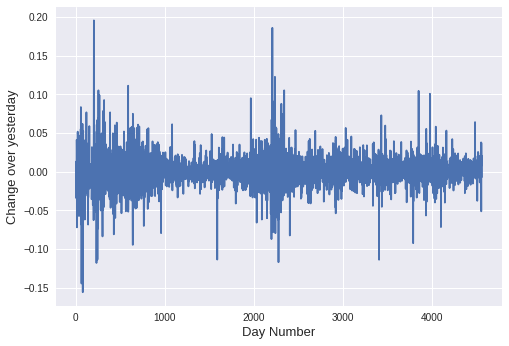

In [35]:
df_stock['Returns'].plot()
plt.xlabel('Day Number', fontsize=13)
plt.ylabel('Change over yesterday',fontsize=13)

Dropping Null values from percent returns.

In [0]:
percent_returns.dropna(inplace=True)

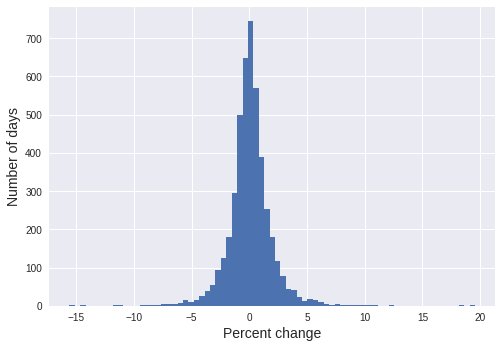

In [37]:
plt.hist(percent_returns, bins=75)
plt.xlabel('Percent change', fontsize=14)
plt.ylabel('Number of days', fontsize=14)
plt.show()


Moments of a distribution:



1.   Mean
2.   Variance
3. Skewness
4. Kurtosis




Normal distributions tend to have a skewness of 0 and kurtosis of 3.

Financial returns however, tend to have positive skewness and kurtosis > 3

This means financial returns have a higher probability of outliers and better or worse returns than a normal distribution.

A long term investor is not very interested in the daily fluctuations of the stocks. They're more interested in the annualized return. Let's calculate that using the following formula:



```
Average annualized return = ((1+mu)^252) - 1
```



In [38]:
import numpy as np

mean_return_daily = np.mean(df_stock['Returns'])

print('Mean daily return is {}'.format(mean_return_daily * 100))

mean_annualized_return = ((1+mean_return_daily)**252) - 1

print('Mean annualized return is {}'.format(mean_annualized_return * 100))

Mean daily return is 0.03777754643575774
Mean annualized return is 9.985839482858783


Thus, mean daily return of 0.03% becomes an annualized return of 9.98%. Now let's calculate the second moment - Variance.

In [39]:
std_daily = np.std(df_stock['Returns'])
print('The daily standard deviation is {}'.format(std_daily))
var_daily = std_daily ** 2
print('The daily variance is {}'.format(var_daily))

The daily standard deviation is 0.019341100408708317
The daily variance is 0.00037407816501973704


We can't annualize volaility (standard deviation) the same way we annualized the mean. We use the following formula to annualize sigma:

```
sigma_annualized = sigma_daily * sqrt(Number_of_trading_days)
```

And annualized variance will be the square of annualized standard deviation.
    

In [40]:
std_annualized = std_daily * np.sqrt(252)
print('The annualized std is {}%'.format(std_annualized*100))
variance_annualized = std_annualized ** 2
print('The annualized variance is {}%'.format(variance_annualized*100))

The annualized std is 30.70304505826315%
The annualized variance is 9.426769758497374%


Let's calculate the third moment - Skewness

For a stock, we would want positive skewness, i.e. a curve leaning towards the left. It means the probability of getting large positive returns is high, while the negative returns are closely clustered and predictable.

Data which are normal distribution would have a skew closer to 0.

In [41]:
from scipy.stats import skew

clean_returns = df_stock['Returns'].dropna()

print('The skew of the returns of MSFT stock is {}'.format(skew(clean_returns)))

The skew of the returns of MSFT stock is 0.21935459193067852


Let's look at Kurtosis. Most financial returns are Letptokurtic. Meaning - it means that they tend to have positive excess kurtosis, or kurtosis > 3. 

Excess kurtosis: Subtract 3 from the sample kurtosis to calculate excess kurtosis.

If excess Kurtosis is greater than 0, the kutosis is higher than  a normal distribution. The kurtosis function from scipy calculates excess kurtosis.

In Finance, high excess kurtosis is an indication of high risk.

In [42]:
from scipy.stats import kurtosis

excess_kurtosis = kurtosis(clean_returns)

print('Excess kurtosis is {}'.format(excess_kurtosis))

forth_moment_kurtosis = excess_kurtosis + 3

print('Forth moment - kurtosis is {}'.format(forth_moment_kurtosis))

Excess kurtosis is 10.31457261802553
Forth moment - kurtosis is 13.31457261802553


Let's do a statistical test of normality to be sure whether the stock data are really normally distributed. The Shapiro-Wilk test is used to do just that.

The shapiro function will return two values: t-stat & p-value

if the p-value is low, we can safely reject the null hypothesis that the data are normally distributed.

In [43]:
from scipy.stats import shapiro

shapiro_result = shapiro(clean_returns)

print('The p-value is {}'.format(shapiro_result[1]))

The p-value is 0.0


The p-value given by the test is 0.0 which is strong evidence against the null hypothesis. Thus we can be sure that the stock data are not normally distributed. 

Let's now construct a portfolio. 

Apple 	AAPL 	12%

Microsoft 	MSFT 	15%

Exxon Mobil 	XOM 	8%

Johnson & Johnson 	JNJ 	5%

JP Morgan 	JPM 	9%

Amazon 	AMZN 	10%

General Electric 	GE 	11%

Facebook 	FB 	14%

AT&T 	T 	16%

In [44]:
files.upload()

Saving StockReturns.txt to StockReturns.txt


{'StockReturns.txt': b'Date,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T,Portfolio\n2017-01-03,0.0028492268058038,0.007080940247811359,0.00697975033897991,0.0054681996135828,0.0108936040009637,0.00506752907215602,0.00284809293644317,0.0157322725145865,0.0115212975553634,0.008082231512877031\n2017-01-04,-0.0011192771163496301,-0.00447437162948028,-0.0110022840351952,-0.00164022016332088,0.0018444508228325801,0.0046572240890214705,0.000315610854184856,0.015659772243198998,-0.00581118811316039,0.00016135546349395314\n2017-01-05,0.00508529881522057,0.0,-0.0149070859852967,0.0104626643831169,-0.00920498131362091,0.0307324800115263,-0.0056782494529598,0.0166820790853133,-0.00280559598746111,0.0034475901552098328\n2017-01-06,0.0111484089785916,0.00866776630693833,-0.000564712935656742,-0.0047919770152348206,0.00011614164236206599,0.0199115609725944,0.00285528844735783,0.022706605166265,-0.0199242584807071,0.004659932078502812\n2017-01-09,0.00915948080060547,-0.0031826351955934803,-0.0164972072246271,-0

In [0]:
#files.download('./StockReturns.csv')

In [64]:
os.listdir()

['.config',
 'sample_data',
 'StockPortfolio.csv',
 'MSFTPrices.csv.txt',
 'StockReturns.csv',
 'StockReturns.txt']

In [70]:
df_StockReturns = pd.read_csv('StockPortfolio.csv', header=0, parse_dates=['Date'], index_col=['Date']) 

df_StockReturns.head()

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
Date,,,,,,,,,
2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521
2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811
2017-01-05,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806
2017-01-06,0.011148,0.008668,-0.000565,-0.004792,0.000116,0.019912,0.002855,0.022707,-0.019924
2017-01-09,0.009159,-0.003183,-0.016497,-0.000172,0.000697,0.001168,-0.004745,0.012074,-0.012585


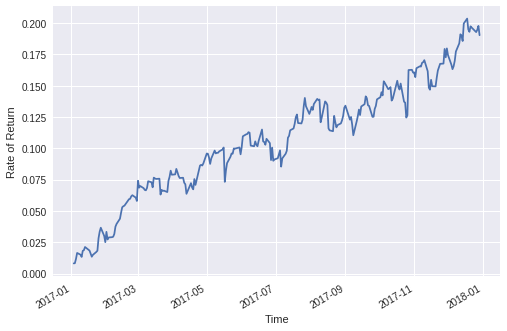

In [69]:

portfolio_weights = np.array([0.12, 0.15, 0.08, 0.05, 0.09, 0.10, 0.11, 0.14, 0.16])

# Calculate the weighted stock returns
WeightedReturns = df_StockReturns.mul(portfolio_weights, axis=1)

df_StockReturns['Portfolio'] = WeightedReturns.sum(axis=1)

# Plot the cumulative portfolio returns over time
CumulativeReturns = ((1+df_StockReturns["Portfolio"]).cumprod()-1)

CumulativeReturns.plot()
plt.xlabel('Time')
plt.ylabel('Rate of Return')
plt.title('Portfolio return prediction')
plt.show()